<a href="https://colab.research.google.com/github/GladwelWanjau/Week-9-Moringa-School-DataScience-Independent-Project/blob/main/Naive_Bayes_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Developing a spam filter to Predict whether an email is spam or not






# Specifying the analysis question
To utilize Naive Bayes Estimator Machine Learning Technique in developing a spam filter.

# Metrics for Success
1.Identify which measurements are most important in predicting whether an email is spam or not. 2.A high accuracy of 80% and above

# Understanding the Context
The data used was collected from both spam and non spam emails which are necessary in developing a spam filter.
It was created by Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt and Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304.


In [76]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import decomposition

# Reading the data

In [37]:
df = pd.read_csv('spambase.data')
df.sample(10)


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
3003,0.0,0.0,0.83,0.0,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.0,0.0,0.00,0.0,0.00,3.33,0.0,0.00,0.0,0.0,0.00,0.0,0.0,1.25,0.0,0.0,0.0,0.0,0.41,0.00,0.41,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.00,0.0,0.0,0.000,0.065,0.000,0.195,0.000,0.0,1.444,22,91,0
2,0.0,0.0,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.0,0.0,0.31,0.0,0.00,3.18,0.0,0.31,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000,0.137,0.000,0.137,0.000,0.0,3.537,40,191,1
955,0.0,0.0,0.00,0.0,3.09,0.00,1.03,1.03,0.00,1.03,0.00,1.03,0.00,0.0,0.0,2.06,0.0,0.00,2.06,0.0,1.03,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.03,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,10.692,65,139,1
4083,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,6.66,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,3.33,0.0,0.0,0.000,0.537,0.000,1.075,0.000,0.0,1.200,3,12,0
4129,0.0,0.0,0.52,0.0,0.00,1.04,0.00,0.00,0.00,0.52,0.00,1.57,0.00,0.0,0.0,0.00,0.0,0.00,3.66,0.0,0.52,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.04,0.0,0.0,0.000,0.000,0.000,0.090,0.000,0.0,1.466,6,44,0
315,0.0,0.0,0.00,0.0,0.91,0.00,0.91,0.00,0.00,0.91,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000,0.134,0.000,0.672,0.269,0.0,4.350,31,87,1
4383,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.0,0.0,0.19,0.0,0.19,0.00,0.0,0.00,0.0,0.0,0.38,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,22.05,0.0,0.0,0.135,0.339,0.067,0.000,0.000,0.0,4.130,81,285,0
2032,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.58,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.58,0.00,0.0,0.0,1.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000,1.182,0.000,0.000,0.000,0.0,2.057,13,72,0
3005,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,4.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,4.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.00,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.111,2,10,0
3652,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,20.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,5,0


In [24]:
df1 = pd.read_csv('spambase.DOCUMENTATION',sep=":",error_bad_lines= False)
df1.sample(10)

b'Skipping line 80: expected 2 fields, saw 6\n'


,1. Title,SPAM E-mail Database
56,9. Class Distribution,NaN
4,(c) Generated,June-July 1999
27,6. Number of Attributes,"58 (57 continuous, 1 nominal class label)"
58,\tNon-Spam 2788 (60.6%),NaN
67,8 0 11.11 0.10529 0.40107 381,NaN
34,capital letters. For the statistical measures...,NaN
57,\tSpam\t 1813 (39.4%),NaN
48,= length of longest uninterrupted sequence of ...,NaN
45,"1 continuous real [1,...] attribute of type ca...",NaN
11,20-25% of the spam passed through the f...,NaN


In [29]:
 df2 = pd.read_csv('spambase.names',sep=":",error_bad_lines= False)
df2.sample(10)

b'Skipping line 29: expected 1 fields, saw 3\nSkipping line 34: expected 1 fields, saw 2\nSkipping line 35: expected 1 fields, saw 2\nSkipping line 36: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 2\nSkipping line 38: expected 1 fields, saw 2\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 40: expected 1 fields, saw 2\nSkipping line 41: expected 1 fields, saw 2\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 43: expected 1 fields, saw 2\nSkipping line 44: expected 1 fields, saw 2\nSkipping line 45: expected 1 fields, saw 2\nSkipping line 46: expected 1 fields, saw 2\nSkipping line 47: expected 1 fields, saw 2\nSkipping line 48: expected 1 fields, saw 2\nSkipping line 49: expected 1 fields, saw 2\nSkipping line 50: expected 1 fields, saw 2\nSkipping line 51: expected 1 fields, saw 2\nSkipping line 52: expected 1 fields, saw 2\nSkipping line 53: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 2\nSkipping line 55: expected 1 f

,| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
18,"| 1 continuous integer [1,...] attribute of ty..."
4,"| total number of words in e-mail. A ""word"" i..."
16,| = length of longest uninterrupted sequence o...
1,"| 48 continuous real [0,100] attributes of typ..."
24,| i.e. unsolicited commercial e-mail.
6,| characters or end-of-string.
21,|
19,| = sum of length of uninterrupted sequences o...
15,"| 1 continuous integer [1,...] attribute of ty..."
12,"| 1 continuous real [1,...] attribute of type ..."


# Checking the data

In [30]:
# Determining the no. of records in our dataset
#
df.shape[0]

102

In [31]:
# Previewing the top of our dataset
#
df.head()

,1. Title: SPAM E-mail Database
0,2. Sources:
1,(b) Donor: George Forman (gforman at nospam...
2,(c) Generated: June-July 1999
3,3. Past Usage:
4,(a) Hewlett-Packard Internal-only Technical...


In [32]:
# Previewing the bottom of our dataset
# 
df.tail()

,1. Title: SPAM E-mail Database
97,56 1 9989 52.173 194.89 374
98,57 1 15841 283.29 606.35 214
99,58 0 1 0.39404 0.4887 124
100,This file: 'spambase.DOCUMENTATION' at the UCI...
101,http://www.ics.uci.edu/~mlearn/MLRepository.html


In [33]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

1. Title:  SPAM E-mail Database    object
dtype: object

# Tidying the data

Text(0.5, 1.0, 'Boxplots')

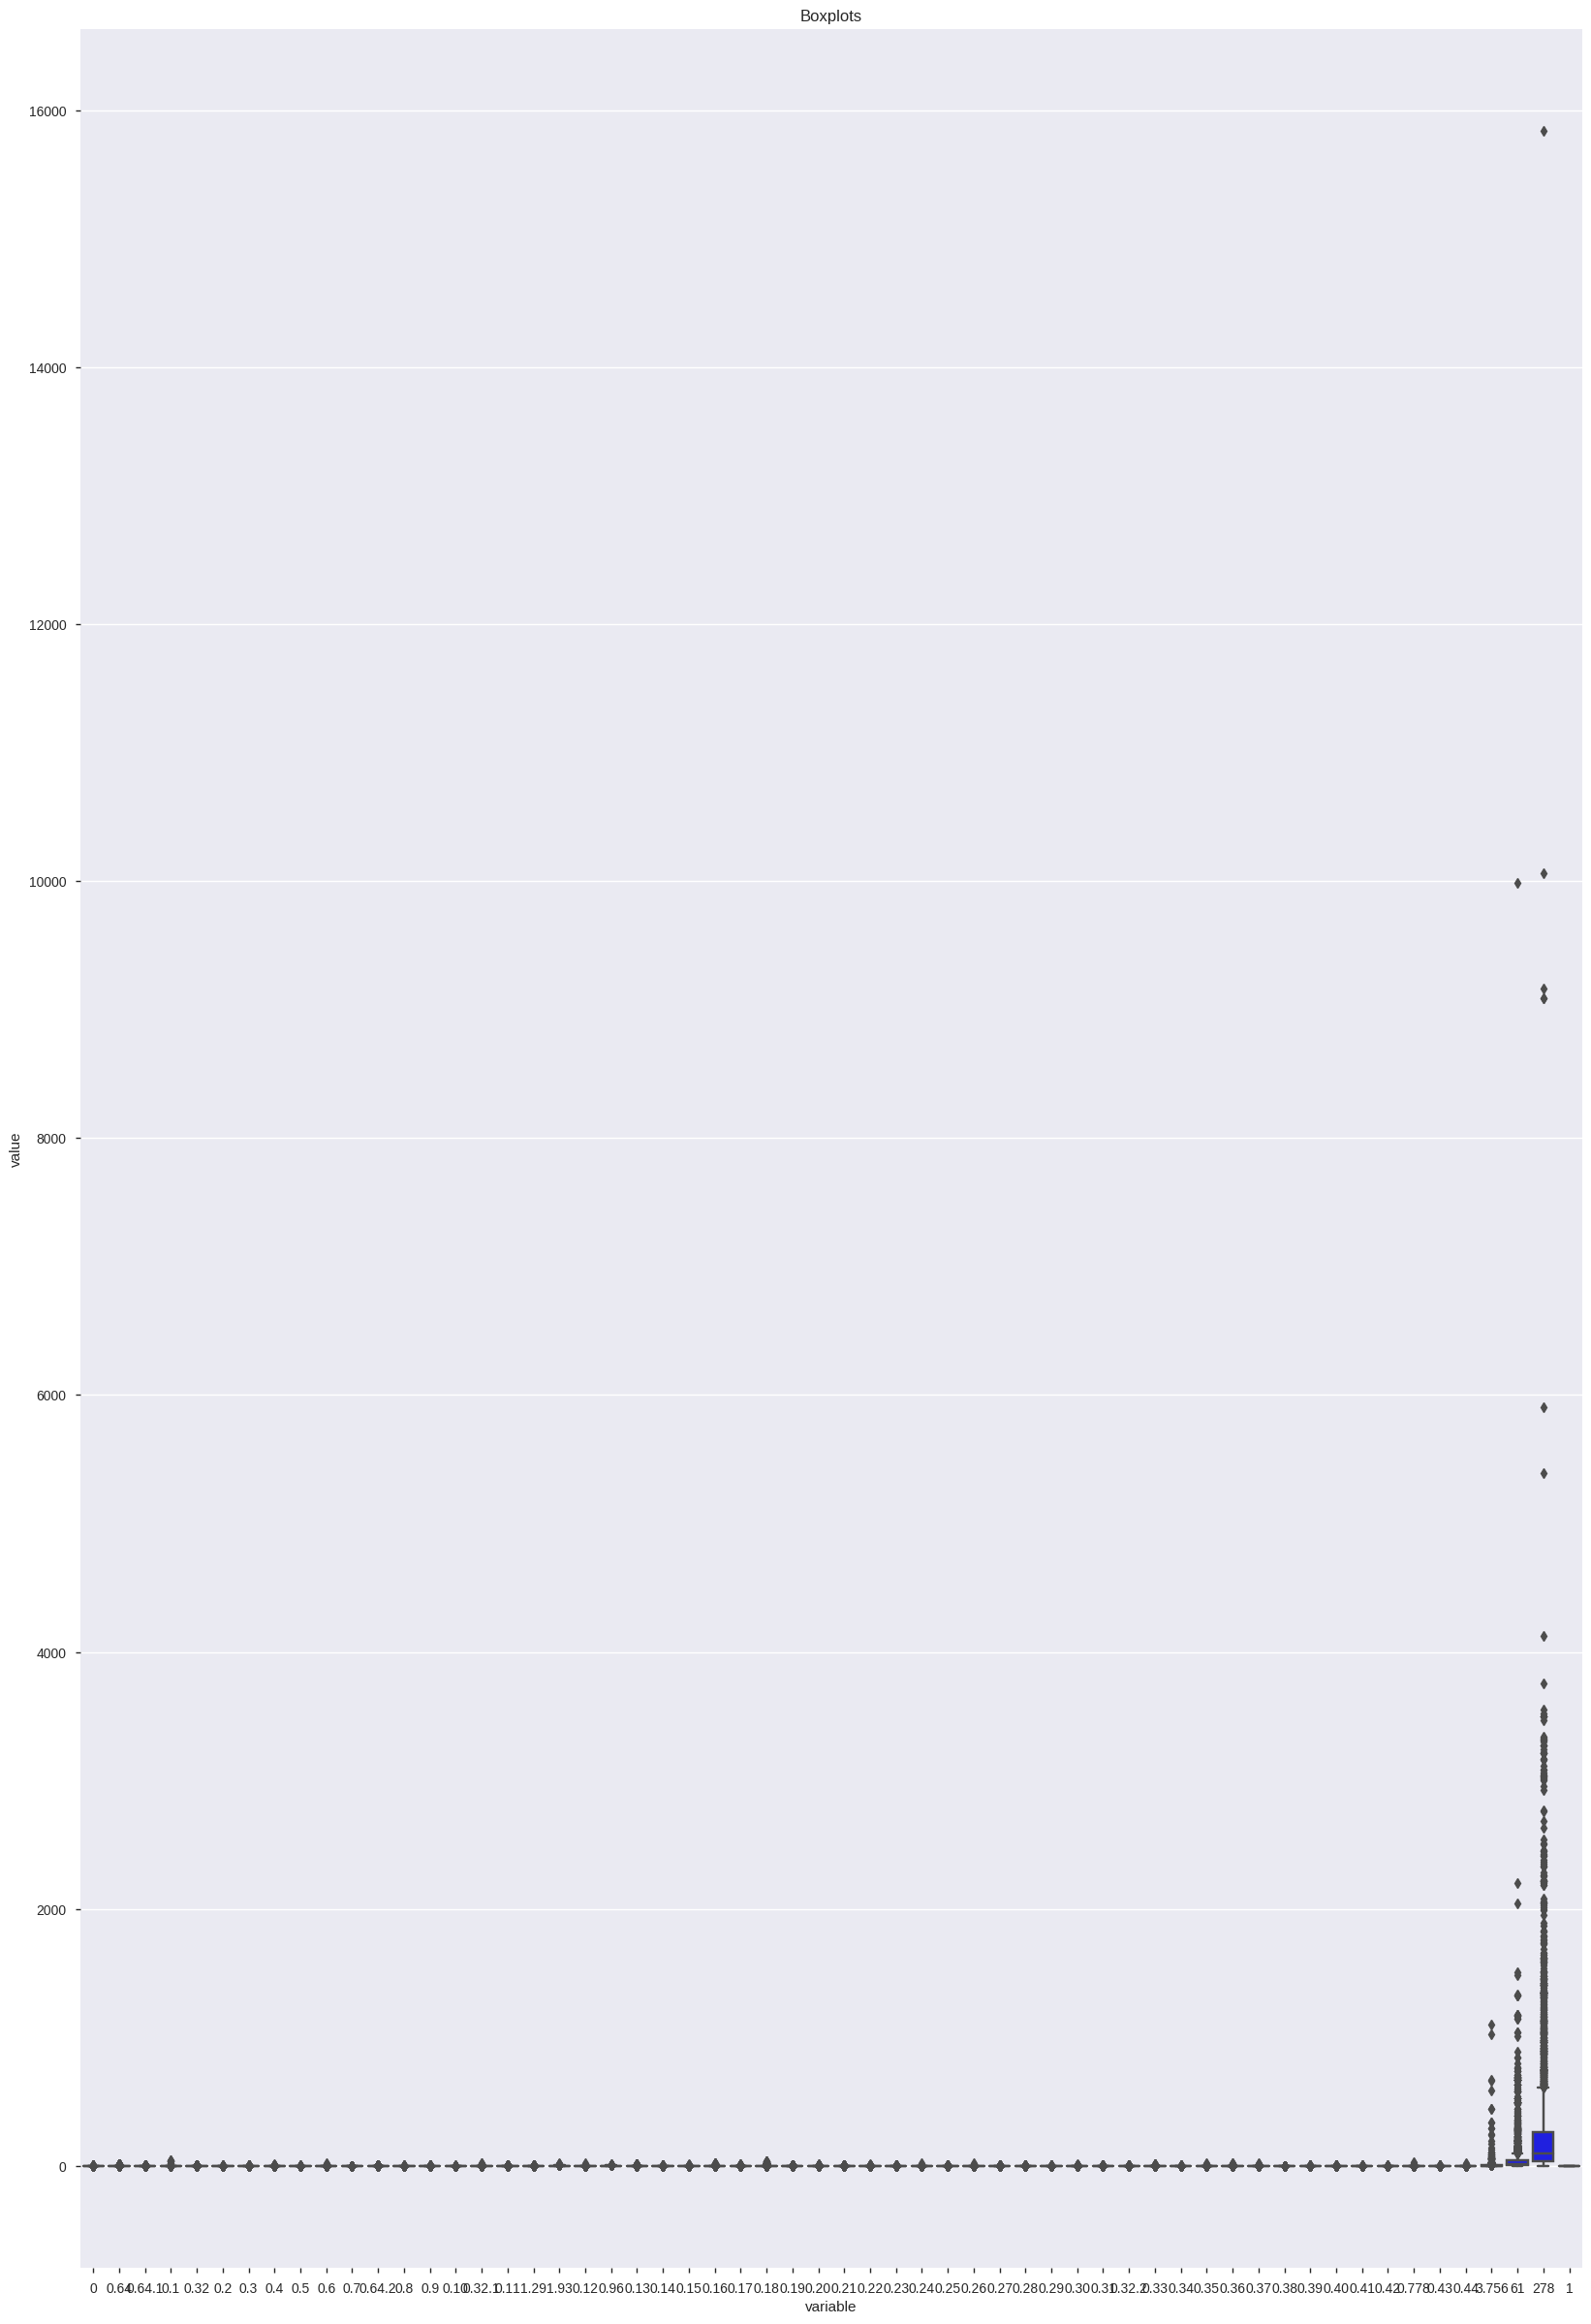

In [81]:
# Checking for Outliers
#
# Checking for Outliers
#
import seaborn as sns
import matplotlib.pyplot as plt

boxplot = pd.DataFrame(data = df)

plt.figure(figsize=(20,30))

sns.boxplot(x="variable", y="value", data=pd.melt(boxplot), color = 'blue').set_title('Boxplots')

In [34]:
df.columns

Index(['1. Title:  SPAM E-mail Database'], dtype='object')

In [38]:
# Checking for Anomalies
#
Q1= df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

0          0.000
0.64       0.000
0.64.1     0.000
0.1        0.000
0.32       0.000
0.2        0.000
0.3        0.000
0.4        0.000
0.5        0.000
0.6        0.000
0.7        0.000
0.64.2     0.000
0.8        0.000
0.9        0.000
0.10       0.000
0.32.1     0.000
0.11       0.000
1.29       0.000
1.93       0.000
0.12       0.000
0.96       0.000
0.13       0.000
0.14       0.000
0.15       0.000
0.16       0.000
0.17       0.000
0.18       0.000
0.19       0.000
0.20       0.000
0.21       0.000
0.22       0.000
0.23       0.000
0.24       0.000
0.25       0.000
0.26       0.000
0.27       0.000
0.28       0.000
0.29       0.000
0.30       0.000
0.31       0.000
0.32.2     0.000
0.33       0.000
0.34       0.000
0.35       0.000
0.36       0.000
0.37       0.000
0.38       0.000
0.39       0.000
0.40       0.000
0.41       0.000
0.42       0.000
0.778      0.000
0.43       0.000
0.44       0.000
3.756      1.588
61         6.000
278       35.000
1          0.000
Name: 0.25, dt

'0.75 quartile'

0           0.00000
0.64        0.00000
0.64.1      0.42000
0.1         0.00000
0.32        0.38250
0.2         0.00000
0.3         0.00000
0.4         0.00000
0.5         0.00000
0.6         0.16000
0.7         0.00000
0.64.2      0.80000
0.8         0.00000
0.9         0.00000
0.10        0.00000
0.32.1      0.10000
0.11        0.00000
1.29        0.00000
1.93        2.64000
0.12        0.00000
0.96        1.27000
0.13        0.00000
0.14        0.00000
0.15        0.00000
0.16        0.00000
0.17        0.00000
0.18        0.00000
0.19        0.00000
0.20        0.00000
0.21        0.00000
0.22        0.00000
0.23        0.00000
0.24        0.00000
0.25        0.00000
0.26        0.00000
0.27        0.00000
0.28        0.00000
0.29        0.00000
0.30        0.00000
0.31        0.00000
0.32.2      0.00000
0.33        0.00000
0.34        0.00000
0.35        0.00000
0.36        0.11000
0.37        0.00000
0.38        0.00000
0.39        0.00000
0.40        0.00000
0.41        0.18800


'0.5 quartile'

0           0.00000
0.64        0.00000
0.64.1      0.42000
0.1         0.00000
0.32        0.38250
0.2         0.00000
0.3         0.00000
0.4         0.00000
0.5         0.00000
0.6         0.16000
0.7         0.00000
0.64.2      0.80000
0.8         0.00000
0.9         0.00000
0.10        0.00000
0.32.1      0.10000
0.11        0.00000
1.29        0.00000
1.93        2.64000
0.12        0.00000
0.96        1.27000
0.13        0.00000
0.14        0.00000
0.15        0.00000
0.16        0.00000
0.17        0.00000
0.18        0.00000
0.19        0.00000
0.20        0.00000
0.21        0.00000
0.22        0.00000
0.23        0.00000
0.24        0.00000
0.25        0.00000
0.26        0.00000
0.27        0.00000
0.28        0.00000
0.29        0.00000
0.30        0.00000
0.31        0.00000
0.32.2      0.00000
0.33        0.00000
0.34        0.00000
0.35        0.00000
0.36        0.11000
0.37        0.00000
0.38        0.00000
0.39        0.00000
0.40        0.00000
0.41        0.18800


In [41]:
# Check for missing values 
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100
#There are no missing values

1         0.0
0.10      0.0
0.18      0.0
0.17      0.0
0.16      0.0
0.15      0.0
0.14      0.0
0.13      0.0
0.96      0.0
0.12      0.0
1.93      0.0
1.29      0.0
0.11      0.0
0.32.1    0.0
0.9       0.0
278       0.0
0.8       0.0
0.64.2    0.0
0.7       0.0
0.6       0.0
0.5       0.0
0.4       0.0
0.3       0.0
0.2       0.0
0.32      0.0
0.1       0.0
0.64.1    0.0
0.64      0.0
0.19      0.0
0.20      0.0
0.21      0.0
0.22      0.0
61        0.0
3.756     0.0
0.44      0.0
0.43      0.0
0.778     0.0
0.42      0.0
0.41      0.0
0.40      0.0
0.39      0.0
0.38      0.0
0.37      0.0
0.36      0.0
0.35      0.0
0.34      0.0
0.33      0.0
0.32.2    0.0
0.31      0.0
0.30      0.0
0.29      0.0
0.28      0.0
0.27      0.0
0.26      0.0
0.25      0.0
0.24      0.0
0.23      0.0
0         0.0
dtype: float64

# Exploratory Data Analysis

In [50]:
# To uninstall pandas profiler
!pip uninstall pandas_profiling

Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/base_command.py", line 153, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/uninstall.py", line 79, in run
    auto_confirm=options.yes, verbose=self.verbosity > 0,
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/req/req_install.py", line 755, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/req/req_uninstall.py", line 388, in remove
    if auto_confirm or self._allowed_to_proceed(verbose):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/req/req_uninstall.py", line 431, in _allowed_to_proceed
    return ask('Proce

In [52]:
#Installing the pandas profiler
!pip install pandas-profiling[notebook,html]

In [54]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
ProfileReport(df)

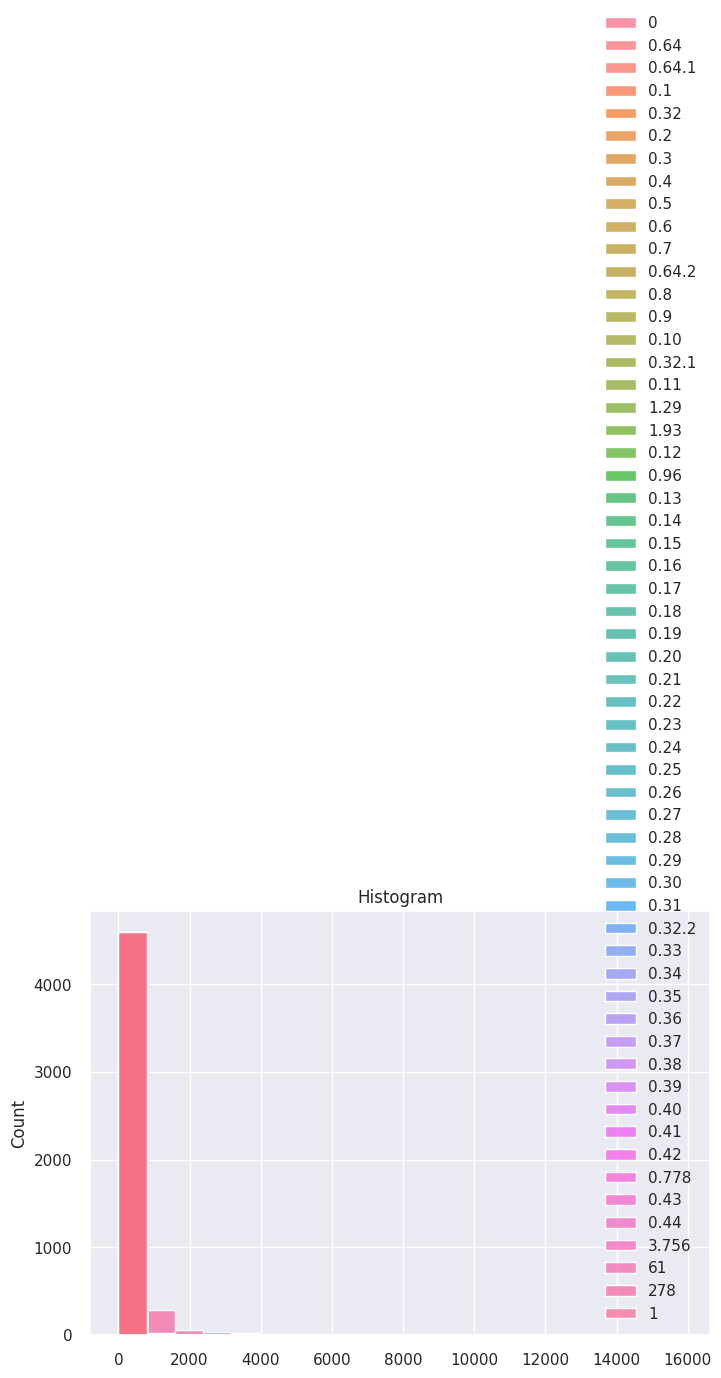

In [97]:
sns.histplot(df)
sns.set(style='darkgrid')
plt.title('Histogram')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split as tts
X = df.drop(['1'], axis=1)
Y = df['1']

# Split data
X_train, X_test, y_train, y_test = tts(X, Y, test_size=.8, random_state=0)

In [70]:
# Random forest to see important features
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [71]:
# Get numerical feature importances
importances = list(classifier.feature_importances_)

# connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.columns, importances)]

# sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: 0.3                  Importance: 0.12
Variable: 0.15                 Importance: 0.1
Variable: 0.778                Importance: 0.1
Variable: 0.96                 Importance: 0.09
Variable: 0.43                 Importance: 0.08
Variable: 0.32.1               Importance: 0.07
Variable: 0.14                 Importance: 0.06
Variable: 3.756                Importance: 0.06
Variable: 61                   Importance: 0.06
Variable: 1.93                 Importance: 0.04
Variable: 278                  Importance: 0.04
Variable: 0.16                 Importance: 0.03
Variable: 0.64.1               Importance: 0.02
Variable: 0.32                 Importance: 0.02
Variable: 0.11                 Importance: 0.02
Variable: 0.4                  Importance: 0.01
Variable: 0.7                  Importance: 0.01
Variable: 0.12                 Importance: 0.01
Variable: 0.17                 Importance: 0.01
Variable: 0.18                 Importance: 0.01
Variable: 0.28                 Importance:

The important features from the random forest are as follows:
1.0.3
2.0.15
3.0.778
4.0.96
5.0.43
.
.
.
etc

In [72]:
# Data Reduction
#
X1 = df[['0.3', '0.15', '0.778','0.96','0.43']].values

In [73]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y, test_size=0.8, random_state=0)

# Implementing the solution

In [74]:
clf= GaussianNB()

In [ ]:
y_pred =  model.predict(X_test)

In [83]:
model = clf.fit(X_train, y_train)

In [84]:
print(np.mean(y_pred == y_test))
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("Classification Report::", metrics.classification_report(y_test, y_pred))
#The accuracy is at 87.17%

0.8717391304347826
Accuracy score: 0.8717391304347826
F1 Score: 0.8129952456418382
Classification Report::               precision    recall  f1-score   support

           0       0.83      0.99      0.90      2207
           1       0.98      0.70      0.81      1473

    accuracy                           0.87      3680
   macro avg       0.90      0.84      0.86      3680
weighted avg       0.89      0.87      0.87      3680



In [85]:
# Implementing the Solution
# 

model = clf.fit(X1_train, y1_train)

In [86]:
y1_pred =  model.predict(X1_test)

In [87]:
print(np.mean(y1_pred == y1_test))

0.8125


In [88]:
from sklearn import metrics

print("Accuracy score:", metrics.accuracy_score(y1_test, y1_pred))
print("F1 Score:", metrics.f1_score(y1_test, y1_pred))
print("Classification Report::", metrics.classification_report(y1_test, y1_pred))

Accuracy score: 0.8125
F1 Score: 0.7169811320754718
Classification Report::               precision    recall  f1-score   support

           0       0.78      0.96      0.86      2207
           1       0.91      0.59      0.72      1473

    accuracy                           0.81      3680
   macro avg       0.84      0.78      0.79      3680
weighted avg       0.83      0.81      0.80      3680



# Conclusion
The accuracy of the model is at 81.25% which is sufficient thus we conclude that the features identified as the most important were correct.However,the model could be improved further by including more features.

# Challenging the solution

# a) Did we have the right question?
Yes.

# b) Did we have the right data?
Yes. The data available was sufficient for analysis.

# c) What can be done to improve the solution?
Tuning the hyperparameters.